In [2]:
#Import packages data and graphs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import packages Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
import statistics

%matplotlib inline

In [3]:
#Read data into dataframes
info=pd.read_csv('Gender_StatsCountry.csv')
stats=pd.read_csv('Gender_StatsData.csv')
#info

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2010,NaN,NaN,Yes,NaN,NaN,2016.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,NaN,Europe & Central Asia,Upper middle income,XK,...,NaN,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2015",NaN,2014,NaN,NaN,NaN
259,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,NaN,Middle East & North Africa,Low income,RY,...,NaN,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2014",NaN,NaN,2012.0,2017.0,NaN
260,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2016","Expenditure survey/budget survey (ES/BS), 2014/15",NaN,2007,2010.0,2017.0,NaN
261,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data were rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2010,"Demographic and Health Survey, 2013/14","Integrated household survey (IHS), 2015",NaN,NaN,1994.0,2017.0,NaN


In [4]:
income=info.filter(['Region']).dropna()

In [5]:
#Unpivot data for ingestion
stats=pd.melt(stats, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],var_name='Year')

In [6]:
#Select only indicators of interest
mask_indicator=stats['Indicator Name'].str.contains('yes')
gendereq=stats[mask_indicator].drop(columns=['Indicator Code'])
#df3['Indicator Name'].unique()
#df3.head()

In [7]:
#Arrange data for ingestion
df=pd.pivot_table(gendereq, values='value', index=['Country Code'],columns=['Indicator Name'], aggfunc=np.sum)
df=df.dropna()
df.to_csv('info.csv')

In [8]:
#Merge dataframes
merged=pd.read_csv('info.csv')
#info.head()
result = pd.concat([merged,income],axis=1)
result.to_csv('info4.csv')
result.columns

Index(['Country Code',
       'Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no)',
       'Law mandates nondiscrimination based on gender in hiring (1=yes; 0=no)',
       'Law mandates paid or unpaid maternity leave (1=yes; 0=no)',
       'Law prohibits or invalidates child or early marriage (1=yes; 0=no)',
       'Legislation exists on domestic violence (1=yes; 0=no)',
       'Legislation exists on sexual harassment in employment (1=yes; 0=no)',
       'Legislation explicitly criminalizes marital rape (1=yes; 0=no)',
       'Legislation specifically addresses sexual harassment (1=yes; 0=no)',
       'Married men and married women have equal ownership rights to property (1=yes; 0=no)',
       'Married women are required by law to obey their husbands (1=yes; 0=no)',
       'Married women can obtain a national ID card in the same way as married men (1=yes; 0=no)',
       'Mothers are guaranteed an equivalent position after maternity leave (1=yes;

In [9]:
features=['Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no)',
       'Law mandates nondiscrimination based on gender in hiring (1=yes; 0=no)',
       'Law mandates paid or unpaid maternity leave (1=yes; 0=no)',
       'Law prohibits or invalidates child or early marriage (1=yes; 0=no)',
       'Legislation exists on domestic violence (1=yes; 0=no)',
       'Legislation exists on sexual harassment in employment (1=yes; 0=no)',
       'Legislation explicitly criminalizes marital rape (1=yes; 0=no)',
       'Legislation specifically addresses sexual harassment (1=yes; 0=no)',
       'Married men and married women have equal ownership rights to property (1=yes; 0=no)',
       'Married women are required by law to obey their husbands (1=yes; 0=no)',
       'Married women can obtain a national ID card in the same way as married men (1=yes; 0=no)',
       'Mothers are guaranteed an equivalent position after maternity leave (1=yes; 0=no)',
       'Nondiscrimination clause mentions gender in the constitution (1=yes; 0=no)',
       'Nonpregnant and nonnursing women can do the same jobs as men (1=yes; 0=no)',
       'Woman''s testimony carries the same evidentiary weight in court as a man''s (1=yes; 0=no)','Women are able to work in the same industries as men (1=yes; 0=no)' ]

In [10]:
len(features)

16

In [11]:
#Next steps slice data, create groups and predict if gender equality leads to higher income
result[result.isnull().any(axis=1)]

,Country Code,Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no),Law mandates nondiscrimination based on gender in hiring (1=yes; 0=no),Law mandates paid or unpaid maternity leave (1=yes; 0=no),Law prohibits or invalidates child or early marriage (1=yes; 0=no),Legislation exists on domestic violence (1=yes; 0=no),Legislation exists on sexual harassment in employment (1=yes; 0=no),Legislation explicitly criminalizes marital rape (1=yes; 0=no),Legislation specifically addresses sexual harassment (1=yes; 0=no),Married men and married women have equal ownership rights to property (1=yes; 0=no),Married women are required by law to obey their husbands (1=yes; 0=no),Married women can obtain a national ID card in the same way as married men (1=yes; 0=no),Mothers are guaranteed an equivalent position after maternity leave (1=yes; 0=no),Nondiscrimination clause mentions gender in the constitution (1=yes; 0=no),Nonpregnant and nonnursing women can do the same jobs as men (1=yes; 0=no),Woman's testimony carries the same evidentiary weight in court as a man's (1=yes; 0=no),Women are able to work in the same industries as men (1=yes; 0=no),Region
5,ARB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
34,CEB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
47,CSS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
59,EAP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
60,EAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
61,EAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
62,ECA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
63,ECS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66,EMU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
71,EUU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [12]:
result=result.dropna()
model=result.iloc[:,1:17]
target=result.iloc[:,17]
prueba_mask=result['Region'].str.contains('North America')
prueba=result[prueba_mask]

prueba1=prueba.drop(['Country Code','Region'],axis=1)
test=result.drop(['Country Code','Region'],axis=1)
result.head()

,Country Code,Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no),Law mandates nondiscrimination based on gender in hiring (1=yes; 0=no),Law mandates paid or unpaid maternity leave (1=yes; 0=no),Law prohibits or invalidates child or early marriage (1=yes; 0=no),Legislation exists on domestic violence (1=yes; 0=no),Legislation exists on sexual harassment in employment (1=yes; 0=no),Legislation explicitly criminalizes marital rape (1=yes; 0=no),Legislation specifically addresses sexual harassment (1=yes; 0=no),Married men and married women have equal ownership rights to property (1=yes; 0=no),Married women are required by law to obey their husbands (1=yes; 0=no),Married women can obtain a national ID card in the same way as married men (1=yes; 0=no),Mothers are guaranteed an equivalent position after maternity leave (1=yes; 0=no),Nondiscrimination clause mentions gender in the constitution (1=yes; 0=no),Nonpregnant and nonnursing women can do the same jobs as men (1=yes; 0=no),Woman's testimony carries the same evidentiary weight in court as a man's (1=yes; 0=no),Women are able to work in the same industries as men (1=yes; 0=no),Region
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Latin America & Caribbean
1,AFG,0.0,0.0,2.0,2.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,South Asia
2,AGO,10.0,0.0,5.0,2.0,6.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,5.0,2.0,5.0,0.0,Sub-Saharan Africa
3,ALB,2.0,4.0,5.0,2.0,10.0,10.0,2.0,3.0,5.0,0.0,3.0,1.0,5.0,0.0,5.0,10.0,Europe & Central Asia
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe & Central Asia


In [13]:
model.columns

Index(['Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no)',
       'Law mandates nondiscrimination based on gender in hiring (1=yes; 0=no)',
       'Law mandates paid or unpaid maternity leave (1=yes; 0=no)',
       'Law prohibits or invalidates child or early marriage (1=yes; 0=no)',
       'Legislation exists on domestic violence (1=yes; 0=no)',
       'Legislation exists on sexual harassment in employment (1=yes; 0=no)',
       'Legislation explicitly criminalizes marital rape (1=yes; 0=no)',
       'Legislation specifically addresses sexual harassment (1=yes; 0=no)',
       'Married men and married women have equal ownership rights to property (1=yes; 0=no)',
       'Married women are required by law to obey their husbands (1=yes; 0=no)',
       'Married women can obtain a national ID card in the same way as married men (1=yes; 0=no)',
       'Mothers are guaranteed an equivalent position after maternity leave (1=yes; 0=no)',
       'Nondis

In [14]:
X = StandardScaler().fit_transform(model)
X

array([[-0.69936895, -0.83703975, -1.78443889, ..., -0.74646563,
        -1.63279719, -1.02041971],
       [-0.69936895, -0.83703975, -0.77735634, ..., -0.74646563,
        -0.6673558 , -1.02041971],
       [ 1.51938928, -0.83703975,  0.73326748, ...,  0.19529624,
         0.78080629, -1.02041971],
       ...,
       [ 0.18813434,  1.38891155,  0.73326748, ...,  1.60793904,
         0.78080629,  1.00919603],
       [-0.25561731, -0.39184949,  0.73326748, ...,  1.60793904,
         0.78080629,  1.00919603],
       [-0.69936895,  1.38891155,  0.73326748, ...,  1.60793904,
         0.78080629,  1.00919603]])

In [15]:
kmeans = KMeans(n_clusters=5)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [16]:
centers = model.cluster_centers_
centers

array([[-0.69936895, -0.83703975, -1.62618306, -1.17845054, -1.25699875,
        -1.08582858, -0.73068826, -1.38296654, -1.49355883, -0.24869568,
        -1.23439718, -0.86448118, -0.85019309, -0.69265066, -1.42591689,
        -0.90444167],
       [ 0.65913389,  0.77189347,  0.55658633,  0.33282234,  0.59449227,
         0.8457418 ,  0.3970454 ,  0.80283267,  0.74365858, -0.29718352,
         0.31409782,  0.62162571,  0.22413403,  1.49228407,  0.78080629,
         0.99851384],
       [-0.69936895, -0.68122316,  0.58220509, -0.82576864, -0.90281166,
        -0.67667293, -0.73068826,  0.12112302,  0.28955643,  2.50298907,
         0.24271661, -0.39292803,  0.197765  , -0.74646563, -0.78803597,
        -0.70582927],
       [-0.09783894, -0.55013936, -0.66545828,  0.34004097,  0.20158551,
        -0.4486857 ,  0.24542787, -0.59425131, -0.69357265, -0.14633247,
        -0.16788903, -0.42627018, -0.34312808, -0.16048047, -0.56008453,
         0.44090362],
       [ 0.08829022,  0.3946533 ,  0

In [17]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [18]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [19]:
P = pd_centers(features, centers)
P

,Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no),Law mandates nondiscrimination based on gender in hiring (1=yes; 0=no),Law mandates paid or unpaid maternity leave (1=yes; 0=no),Law prohibits or invalidates child or early marriage (1=yes; 0=no),Legislation exists on domestic violence (1=yes; 0=no),Legislation exists on sexual harassment in employment (1=yes; 0=no),Legislation explicitly criminalizes marital rape (1=yes; 0=no),Legislation specifically addresses sexual harassment (1=yes; 0=no),Married men and married women have equal ownership rights to property (1=yes; 0=no),Married women are required by law to obey their husbands (1=yes; 0=no),Married women can obtain a national ID card in the same way as married men (1=yes; 0=no),Mothers are guaranteed an equivalent position after maternity leave (1=yes; 0=no),Nondiscrimination clause mentions gender in the constitution (1=yes; 0=no),Nonpregnant and nonnursing women can do the same jobs as men (1=yes; 0=no),Womans testimony carries the same evidentiary weight in court as a mans (1=yes; 0=no),Women are able to work in the same industries as men (1=yes; 0=no),prediction
0,-0.699369,-0.837040,-1.626183,-1.178451,-1.256999,-1.085829,-0.730688,-1.382967,-1.493559,-0.248696,-1.234397,-0.864481,-0.850193,-0.692651,-1.425917,-0.904442,0
1,0.659134,0.771893,0.556586,0.332822,0.594492,0.845742,0.397045,0.802833,0.743659,-0.297184,0.314098,0.621626,0.224134,1.492284,0.780806,0.998514,1
2,-0.699369,-0.681223,0.582205,-0.825769,-0.902812,-0.676673,-0.730688,0.121123,0.289556,2.502989,0.242717,-0.392928,0.197765,-0.746466,-0.788036,-0.705829,2
3,-0.097839,-0.550139,-0.665458,0.340041,0.201586,-0.448686,0.245428,-0.594251,-0.693573,-0.146332,-0.167889,-0.426270,-0.343128,-0.160480,-0.560085,0.440904,3
4,0.088290,0.394653,0.724875,0.391474,0.318230,0.392017,0.108534,0.449354,0.588428,-0.297184,0.466683,0.364415,0.474443,-0.644441,0.772761,-0.516398,4


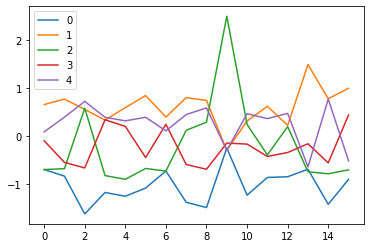

In [20]:
plt.plot(centers[0],label='0')
plt.plot(centers[1],label='1')
plt.plot(centers[2],label='2')
plt.plot(centers[3],label='3')
plt.plot(centers[4],label='4')
plt.legend()
plt.show()

In [21]:
a=kmeans.predict(test)
a

array([3, 4, 1, 1, 3, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 4, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 4, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1,
       1, 3, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 4, 3, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1,
       3, 1, 1, 1, 1, 1, 4, 4, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1])

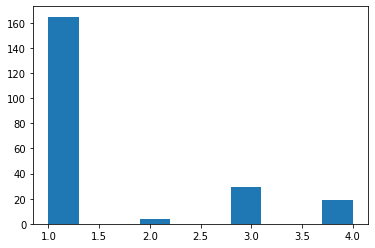

In [22]:
plt.hist(a)
plt.show()